In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(x_train, y_train), (x_test, y_test) =  keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

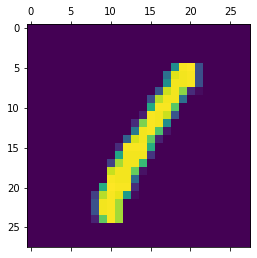

In [10]:
plt.matshow(x_train[3])

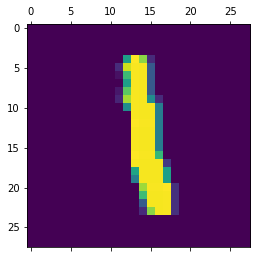

In [11]:
plt.matshow(x_train[6])

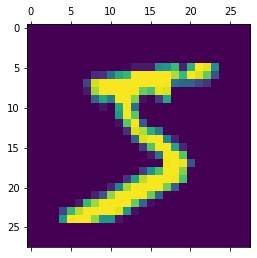

In [12]:
plt.matshow(x_train[0])

In [13]:
y_train[0]

5

In [18]:
x_train_f = x_train.reshape(len(x_train), 28*28)
x_test_f = x_test.reshape(len(x_test), 28*28)


In [22]:
x_train_f_s = x_train_f/255
x_test_f_s = x_test_f/255

In [26]:
x_train_f_s[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,  input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train_f_s, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4723 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.9147 ETA: 1s - los - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9235: 
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9250


In [27]:
model.evaluate(x_test_f_s, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9254


[0.2696329951286316, 0.9254000186920166]

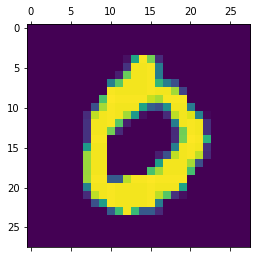

In [28]:
plt.matshow(x_test[3])

In [29]:
y_predicted = model.predict(x_test_f_s)

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [39]:
y_predicted[3]

array([9.9906373e-01, 2.3454959e-08, 1.0155603e-01, 6.7957938e-03,
       8.3523562e-05, 8.0528855e-02, 1.2012836e-01, 1.1348993e-02,
       3.2349467e-02, 1.1364311e-02], dtype=float32)

In [32]:
np.argmax(y_predicted[3])

0

In [34]:
tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  931,   21,    9,    2,   11,    9,   34,    3],
       [   2,    0,   15,  942,    1,   17,    3,    8,   17,    5],
       [   1,    1,    4,    1,  929,    0,   10,    3,   10,   23],
       [   8,    3,    6,   48,   12,  752,   17,    6,   35,    5],
       [   9,    3,    6,    1,    8,    7,  919,    2,    3,    0],
       [   1,    5,   25,   10,   10,    0,    0,  946,    3,   28],
       [   4,   10,    7,   31,    9,   20,    9,   11,  869,    4],
       [   9,    7,    2,   15,   49,    5,    0,   23,    9,  890]])>

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100,  input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train_f_s, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2722 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0880 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0535 - accuracy: 0.9832


In [36]:
model.evaluate(x_test_f_s, y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.0766 - accuracy: 0.9756


[0.07663456350564957, 0.975600004196167]

In [40]:
tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  931,   21,    9,    2,   11,    9,   34,    3],
       [   2,    0,   15,  942,    1,   17,    3,    8,   17,    5],
       [   1,    1,    4,    1,  929,    0,   10,    3,   10,   23],
       [   8,    3,    6,   48,   12,  752,   17,    6,   35,    5],
       [   9,    3,    6,    1,    8,    7,  919,    2,    3,    0],
       [   1,    5,   25,   10,   10,    0,    0,  946,    3,   28],
       [   4,   10,    7,   31,    9,   20,    9,   11,  869,    4],
       [   9,    7,    2,   15,   49,    5,    0,   23,    9,  890]])>

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3812 - accuracy: 0.8434: 1s - loss: 3.1140 - accu
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4053 - accuracy: 0.9050: 0s - loss: 0.409
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2959 - accuracy: 0.9262
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2457 - accuracy: 0.9355
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2305 - accuracy: 0.9401
